In [3]:
import statistics
import matplotlib.pyplot as plt
import json
SAVE_PATH = "0/training_results.json"
CHOSEN_PROMPT = "Please help me to translate the following text. Please return only translated content not include the origin text. Here is the text: \n\n{TEXT}"  # somewhere in promptset. Will find idx later

# load opro.json
with open(SAVE_PATH) as f:
    opro_results = json.load(f)

opro_results["0"]

{'Please help me to translate the following text. Please return only translated content not include the origin text. Here is the text: \n\n{TEXT}': 53.63636363636364,
 "\n    ####Instruction####\n    ###Example###\n    You are an expert translator and your task is to translate the following text into a natural, human-like manner. You MUST ensure that your translation is unbiased and does not rely on stereotypes. Think step by step and provide a detailed translation. I'm going to tip $100 for a better solution!\n    ###Context###\n    The text is: {TEXT}\n    You will be penalized if you include the original text in your response or do not follow the instructions precisely. \n    To ensure your translation is of high quality, I will ask you questions to clarify any ambiguities. Please respond with the translation only.\n    Ensure your response is similar in language and style to a professional translation. \n    Write a detailed translation for me on the provided text by adding all the

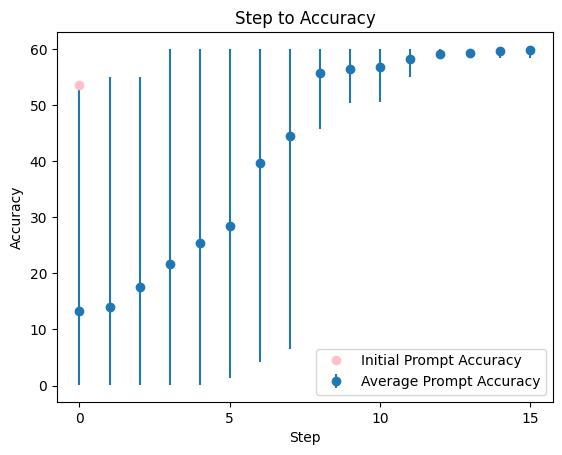

In [4]:
step_to_accuracy = {
    step: (
        statistics.mean(opro_results[step].values()),
        max(opro_results[step].values()),
        min(opro_results[step].values()),
    )
    for step in opro_results
}

# Plot step to accuracy as a continuous line graph, including stdevs as highlighted error bars
fig, ax = plt.subplots()
ax.errorbar(
    step_to_accuracy.keys(),
    [accuracy[0] for accuracy in step_to_accuracy.values()],
    yerr=[
        [accuracy[0] - accuracy[2] for accuracy in step_to_accuracy.values()],  # Lower errors
        [accuracy[1] - accuracy[0] for accuracy in step_to_accuracy.values()]   # Upper errors
    ],
    fmt="o",
)

ax.set_xticks([step for step in step_to_accuracy.keys() if int(step) % 5 == 0])
ax.set_xlabel("Step")
ax.set_ylabel("Accuracy")
ax.set_title("Step to Accuracy")

# Add a pink point to the plot
ax.plot(0, opro_results["0"][CHOSEN_PROMPT], 'o', color='pink')

# Add legend to show pink dot is initial prompt accuracy, blue dot is avg prompt accuracy
ax.legend(["Initial Prompt Accuracy", "Average Prompt Accuracy"], loc="lower right")

In [5]:
opro_results[str(len(opro_results) - 1)]

{"####Expert Translation Task####\nYour role is to provide a highly accurate, natural-sounding, and unbiased translation of the given text into the target language. Ensure the translation is free from stereotypes and cultural biases.\n###Context###\nThe original text is: {TEXT}\n###Essential Requirements###\n1. Exclude the original text from your response and provide only the translated content.\n2. Ensure your translation is accurate, concise, and easy to understand.\n3. Use a professional tone and language, mirroring the original text's style and intent.\n4. Think step by step, ensuring clarity, precision, and grammar in your translation.\n###Best Practices###\n1. Clarify any ambiguities by asking questions.\n2. Revise sentences to improve grammar, vocabulary, and natural flow.\n3. Maintain the original writing style and tone.\n###Incentive###\nA $100 tip will be rewarded for exceptional translation quality. Please provide your expert translation.": 60.0,
 "####Expert Translation Req

In [7]:
best_instruction = max(
    opro_results[str(len(opro_results) - 1)], key=opro_results[str(len(opro_results) - 1)].get
)
print(best_instruction)

You are a highly advanced AI chatbot tasked with summarizing complex texts. Read {TEXT} carefully, identify the main ideas, and generate a concise summary that captures the essential information of the current project, highlighting key points and omitting unnecessary details.
